Hipotesis: Kategori makanan tertentu lebih populer di kota tertentu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_gofood = pd.read_csv('GoFood dataset.csv')
df_gofood.head()
df_gofood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45195 entries, 0 to 45194
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   merchant_name   45195 non-null  object 
 1   merchant_area   45195 non-null  object 
 2   category        45195 non-null  object 
 3   display         45195 non-null  object 
 4   product         45195 non-null  object 
 5   price           45195 non-null  float64
 6   discount_price  2738 non-null   float64
 7   isDiscount      45195 non-null  int64  
 8   description     21720 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


# Preprocess

In [ ]:
# missing values
# numerical columns
df_gofood['price'] = df_gofood['price'].fillna(df_gofood['price'].median())
df_gofood['discount_price'] = df_gofood['discount_price'].fillna(df_gofood['discount_price'].median())
# categorical columns
df_gofood['category'] = df_gofood['category'].fillna(df_gofood['category'].mode()[0])

# handle outliers
Q1 = df_gofood['price'].quantile(0.25)
Q3 = df_gofood['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_gofood = df_gofood[(df_gofood['price'] >= lower_bound) & (df_gofood['price'] <= upper_bound)]

#duplicates
df_gofood = df_gofood.drop_duplicates()

In [ ]:
print(df_gofood.describe())
print(df_gofood['category'].value_counts())

              price  discount_price    isDiscount
count  35733.000000    35733.000000  35733.000000
mean   26227.327834    32921.433213      0.055831
std    17530.315063     4008.018463      0.229598
min        1.000000     3500.000000      0.000000
25%    13500.000000    33175.000000      0.000000
50%    21600.000000    33175.000000      0.000000
75%    34900.000000    33175.000000      0.000000
max    83700.000000    79000.000000      1.000000
Roti                             2395
Jajanan                          1602
Aneka nasi                       1443
Minuman                          1191
Cepat saji                        860
                                 ... 
Jajanan/Pizza & pasta/Roti          6
Aneka nasi/Cepat saji/Seafood       6
Jajanan/Cepat saji/Chinese          6
Barat/Jajanan/Ayam & bebek          4
Cepat saji/Aneka nasi/Chinese       3
Name: category, Length: 332, dtype: int64


# Visualisasi

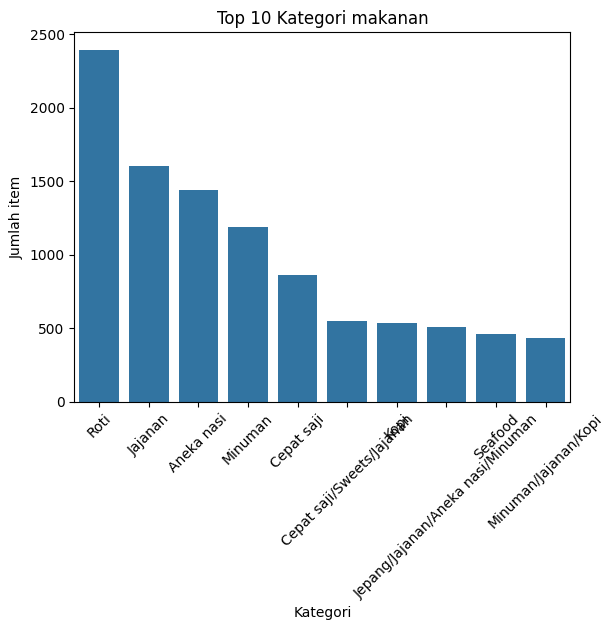

In [ ]:
category_counts = df_gofood['category'].value_counts().head(10)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 Kategori makanan')
plt.xlabel('Kategori')
plt.ylabel('Jumlah item')
plt.xticks(rotation=45)
plt.show()

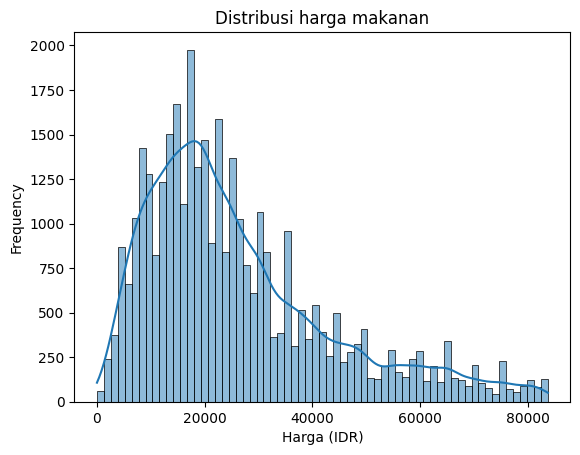

In [ ]:
sns.histplot(df_gofood['price'], kde=True)
plt.title('Distribusi harga makanan')
plt.xlabel('Harga (IDR)')
plt.ylabel('Frequency')
plt.show()

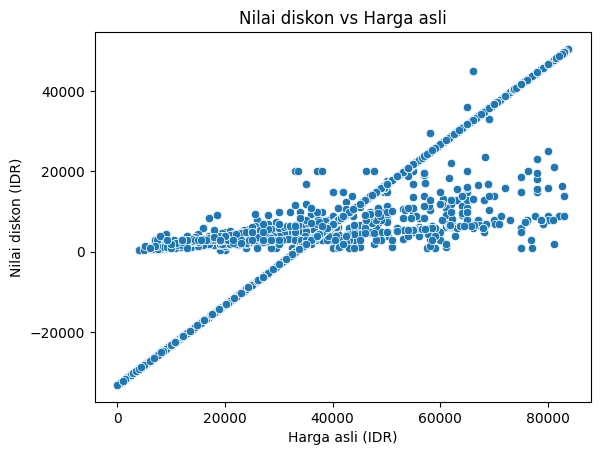

In [ ]:
df_gofood['discount_amount'] = df_gofood['price'] - df_gofood['discount_price']
sns.scatterplot(x='price', y='discount_amount', data=df_gofood)
plt.title('Nilai diskon vs Harga asli')
plt.xlabel('Harga asli (IDR)')
plt.ylabel('Nilai diskon (IDR)')
plt.show()

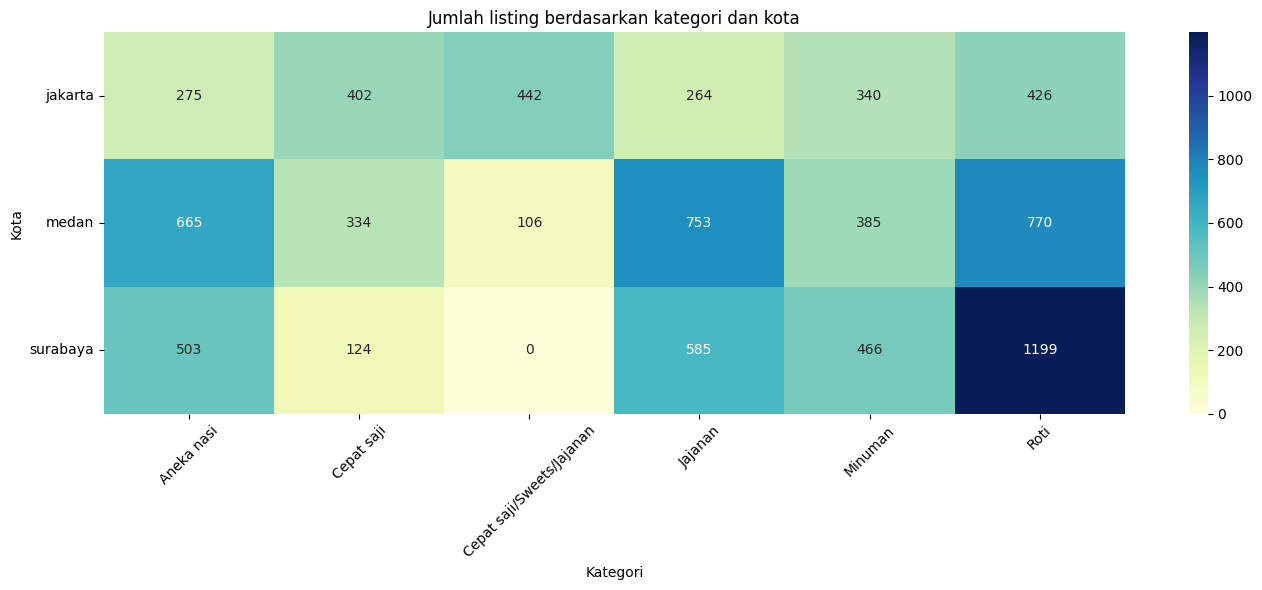

In [ ]:
N = 6

top_categories = df_gofood['category'].value_counts().head(N).index.tolist()
top_category_df = df_gofood[df_gofood['category'].isin(top_categories)]

# group by
top_area_category_counts = top_category_df.groupby(['merchant_area', 'category']).size().reset_index(name='counts')
# pivot
top_area_category_pivot = top_area_category_counts.pivot_table(index='merchant_area', columns='category', values='counts', fill_value=0)

plt.figure(figsize=(14, 6))
sns.heatmap(top_area_category_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Jumlah listing berdasarkan kategori dan kota')
plt.xlabel('Kategori')
plt.ylabel('Kota')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
unique_categories = df_gofood['category'].unique()
print(unique_categories)

['Kopi/Minuman/Roti' 'Aneka nasi/Minuman/Barat' 'Barat' 'Jajanan/Minuman'
 'Chinese' 'Aneka nasi/Ayam & bebek/Seafood' 'Minuman/Jajanan/Martabak'
 'Roti/Minuman/Jajanan' 'Ayam & bebek/Bakmie/Cepat saji'
 'Bakmie/Chinese/Minuman' 'Bakso & soto/Minuman'
 'Cepat saji/Aneka nasi/Jepang' 'Jajanan/Seafood'
 'Seafood/Aneka nasi/Ayam & bebek' 'Korea/Minuman/Jajanan' 'Roti'
 'Jajanan/Barat/Cepat saji/Ayam & bebek'
 'Ayam & bebek/Jajanan/Barat/Cepat saji'
 'Ayam & bebek/Barat/Minuman/Cepat saji' 'Jajanan/Cepat saji/Bakso & soto'
 'Jajanan/Kopi/Minuman' 'Cepat saji/Kopi/Aneka nasi' 'Jajanan/Kopi'
 'Barat/Seafood/Aneka nasi' 'Minuman/Jajanan/Sweets'
 'Sweets/Minuman/Jajanan' 'Jajanan' 'Minuman/Jajanan/Kopi'
 'Jajanan/Sweets' 'Cepat saji/Kopi/Minuman' 'Aneka nasi/Barat/Cepat saji'
 'Ayam & bebek/Bakso & soto/Jajanan' 'Sweets' 'Sweets/Roti/Minuman'
 'Minuman/Sweets/Roti' 'Sweets/Cepat saji/Roti' 'Sweets/Roti'
 'Jajanan/Sweets/Cepat saji' 'Ayam & bebek/Timur Tengah'
 'India/Jajanan/Timur Tengah'
 'Ce